In [1]:
# 필요한 패키지 설치
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
df = pd.read_csv("./data/heart_2020_cleaned.csv")

# 데이터 샘플 확인
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
# BMI 컬럼의 분포 확인

df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

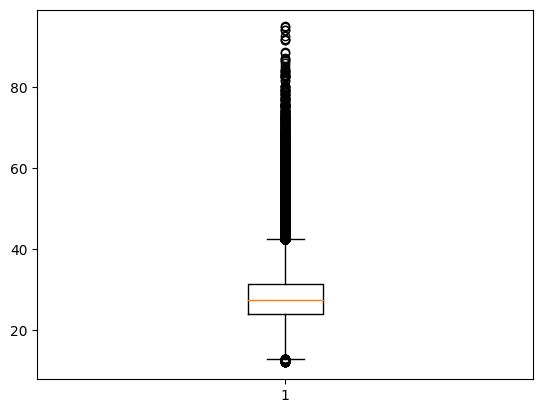

In [4]:
# BMI 컬럼의 박스플롯 시각화를 통한 이상치 확인

plt.boxplot(df['BMI'])
plt.show()

### 이상치가 이상하게 측정된 데이터여서 나쁘다고 생각하면 안 된다.
### 이상치가 오히려 의미있고, 중요한 데이터일 수 있다.
### 예를들어, 시험결과가 10점 20점 40점인데 어떤 학생이 100점을 맞음
### 시험의 평균이 25점일 때, 100점은 이상치일까? 아니다. 의미있는 데이터임

In [5]:
# BMI 컬럼의 이상치 제거 (IQR*3)

# Q1, Q3 범위 정의
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1    #IQR 범위. 

rev_range = 3  # 제거 범위 조절 변수 설정

# 이상치 범위 설정
filter = (df['BMI'] >= Q1 - rev_range * IQR) & (df['BMI'] <= Q3 + rev_range *IQR)
df_rmv = df.loc[filter]
print(df['BMI'].describe())
print(df_rmv['BMI'].describe())

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64
count    318477.000000
mean         28.193173
std           6.010014
min          12.020000
25%          24.020000
50%          27.320000
75%          31.320000
max          53.590000
Name: BMI, dtype: float64


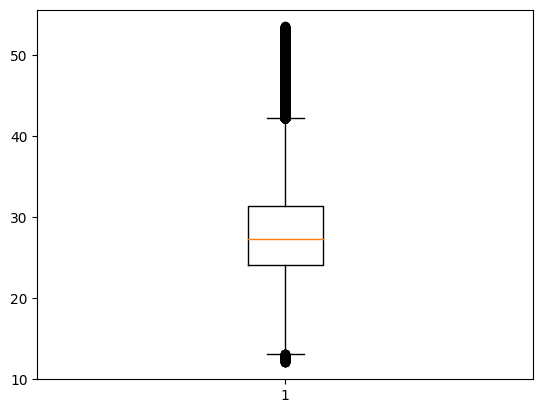

In [6]:
# 이상치 제거 후 박스플롯 시각화


plt.boxplot(df_rmv['BMI'])
plt.show()

## 연습문제

In [1]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

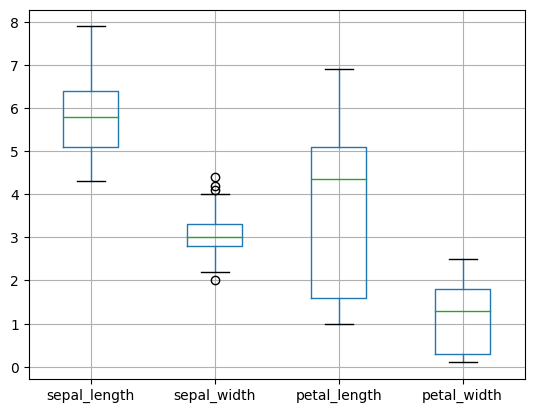

In [3]:
iris.boxplot()

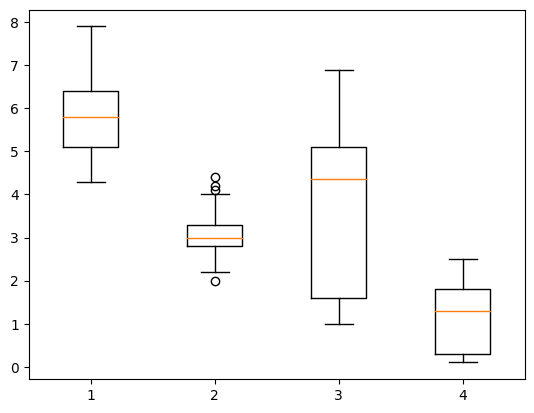

In [11]:
plt.boxplot(iris[['sepal_length','sepal_width','petal_length','petal_width']])
plt.show()

## 타이터닉 데이터에 대해 이상치를 제거 하시오.

In [9]:
titanic = sns.load_dataset('titanic')
titanic.head(3)
# fare컬럼의 분포를 확인하고 적절한 이상치 가공방식을 결정하세요. 가공 전 / 가공 후의 시각화 결과

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [11]:
titanic['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

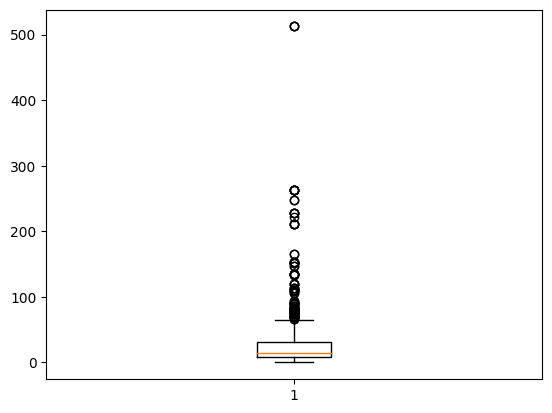

In [13]:
plt.boxplot(titanic['fare'])
plt.show()

In [14]:
# BMI 컬럼의 이상치 제거 (IQR*3)

# Q1, Q3 범위 정의
Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)
IQR = Q3 - Q1    #IQR 범위. 

rev_range = 3  # 제거 범위 조절 변수 설정

# 이상치 범위 설정
filter = (titanic['fare'] >= Q1 - rev_range * IQR) & (titanic['fare'] <= Q3 + rev_range *IQR)
df_rmv = titanic.loc[filter]
print(titanic['fare'].describe())
print(df_rmv['fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64
count    838.000000
mean      22.411942
std       20.827218
min        0.000000
25%        7.895800
50%       13.000000
75%       27.720800
max       93.500000
Name: fare, dtype: float64


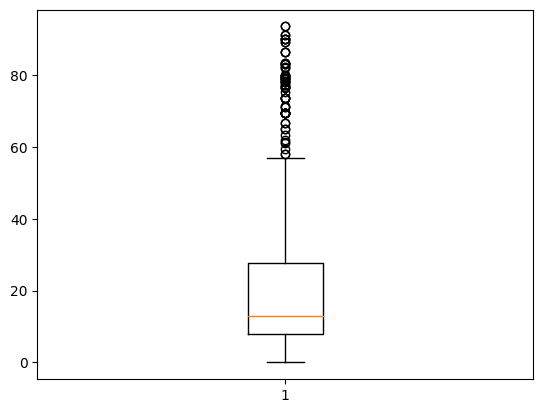

In [15]:
plt.boxplot(df_rmv['fare'])
plt.show()